In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (10,6)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

import pickle

from sklearn.metrics import roc_curve, auc

# Just a Brief Look at a ROC

We briefly took a peak through http://research.microsoft.com/pubs/115396/EvaluationMetrics.TR.pdf to see what other mechanisms were out there for evaluating recommendations, but didn't implement many of them. For now, we assume that a score of >3 is a 1, and <3 is a 0. Then check the AUC score for our results. The logic being that we are somehow less interested in stars and more interested in whether or not a user will watch a movie - which is a binary state.

In [11]:
f = open("all_ratings_results.csv", 'r')

def would_watch(score):
    if score <= 3:
        return 0
    return 1

truth = []
predictions = []

for line in f:
    s = line.split(',')
    
    t = float(s[0])
    p = float(s[1])
    
    truth.append(would_watch(t))
    predictions.append(p/5.0)
    
del(f)

In [12]:
truth[0:5]

[1, 1, 1, 1, 1]

In [14]:
predictions[0:5]

[0.7010457999999999, 0.6871876, 0.6982552, 0.7106554, 0.8051746]

In [17]:
false_positive_rate, recall, thresholds = roc_curve(truth, predictions, pos_label=1)
auc_score = auc(false_positive_rate, recall)

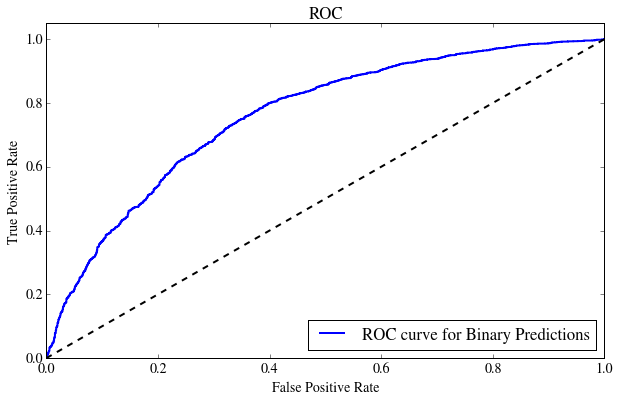

In [18]:

plt.figure()

plt.plot(false_positive_rate, 
         recall, 
         label='ROC curve for Binary Predictions')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()